In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# Data Set Description

The Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a taxonomy, or grouping, for personality traits. When factor analysis (a statistical technique) is applied to personality survey data, some words used to describe aspects of personality are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". This theory is based therefore on the association between words but not on neuropsychological experiments. This theory uses descriptors of common language and therefore suggests five broad dimensions commonly used to describe the human personality and psyche.

## The Dataset
This dataset contains 1,015,342 questionnaire answers collected online by Open Psychometrics.

## Source: https://www.kaggle.com/datasets/tunguz/big-five-personality-test

## Data Size: 
- Features: 51
- Instances: 874366

# Load Dataset

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("/Users/samriddhikumari/Desktop/College/symb/SEM_4/UMLab/DataSets/big_5_personality_test/data-final-clean.csv")

In [4]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
874362,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
874363,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
874364,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


# Data Preprocessing
There is no need for imputation or scaling as data is cleaned.

In [5]:
df.isna().sum().sum()

0

In [6]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country'],
      dtype='object')

In [7]:
# creating test set to give supervised model unseen data
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.33, random_state=42)

In [8]:
X_train_proc = X_train.drop(columns='country')

# Exploratory Data Analysis

## Correlation Matrix

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of Big Five trait-related columns
trait_columns = [
    'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
    'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
    'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10',
    'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
    'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'
]

# Calculate the correlation matrix for the specified columns

corr_matrix = X_train[trait_columns].corr()


## Feature Distribution

/var/folders/vh/n3strt_534939xw39f889k840000gn/T/ipykernel_30108/1277511251.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


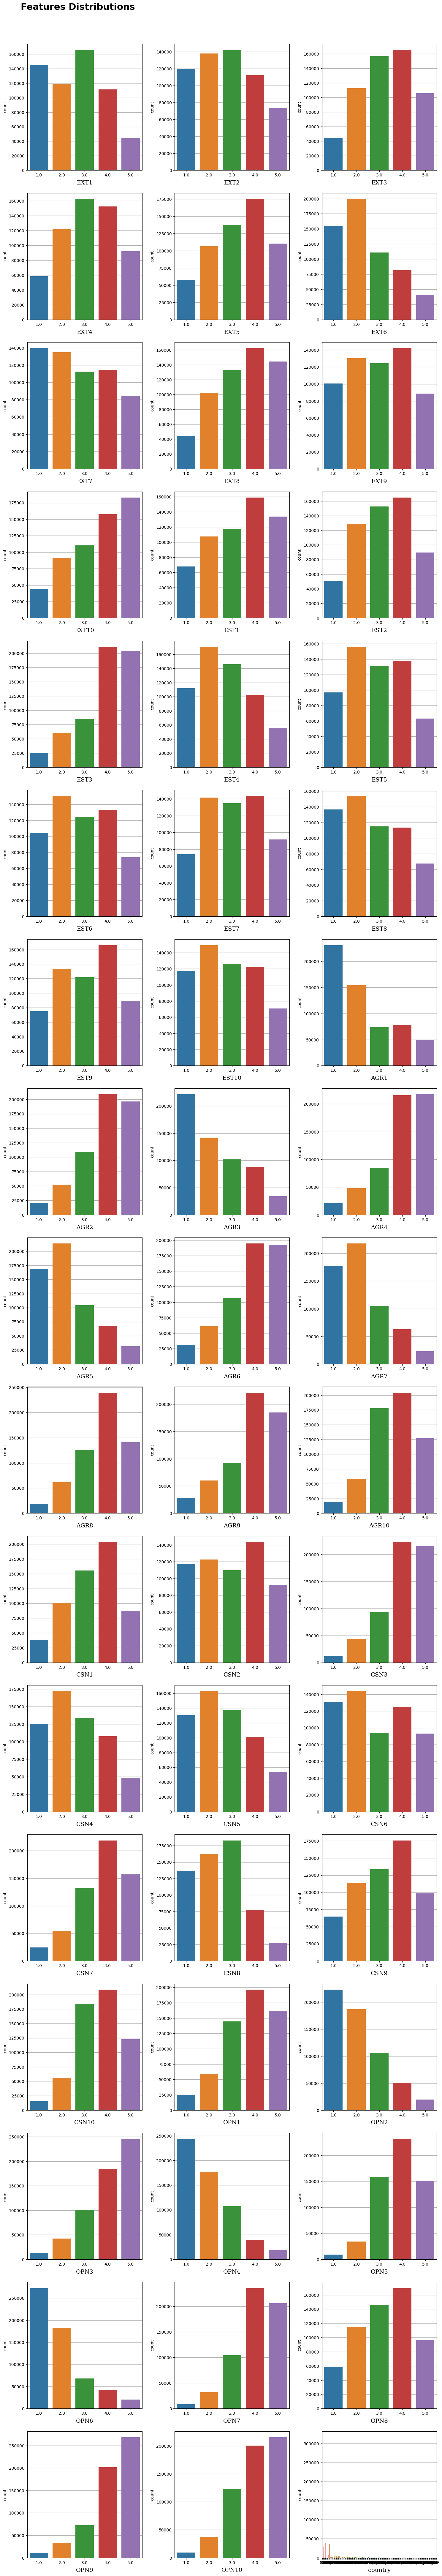

In [10]:
features = list(X_train.columns)

rows = 20
cols = 3
fig = plt.figure(figsize=(15, 100))
for index, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.countplot(x=feature, data=X_train, alpha=1, linewidth=1.5, zorder=2)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

# Applying K-Means Clustering

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# yellowbrick is an ML visualisation library, we will use to product silhouette diagrams
from yellowbrick.cluster import SilhouetteVisualizer

In [12]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_train_proc)

In [13]:
# due to size of dataset, use random sample to calculate sihlouette score
# create new index column so that indices from test set are removed when sample is obtained
X_train_proc['id'] = range(0,len(X_train_proc))

In [14]:
X_train_proc_sample = X_train_proc.sample(n=10000)

In [15]:
silhouette_score(X_train_proc_sample,kmeans.labels_[X_train_proc_sample['id']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


-0.0136516101932205

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


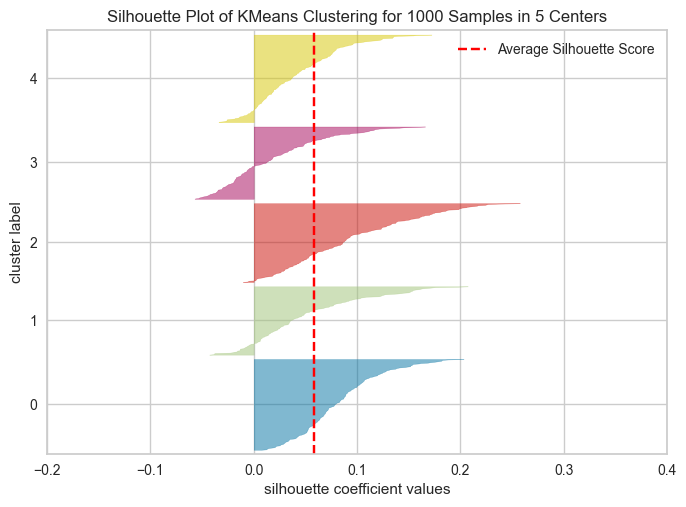

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
# our initial model with 5 centroids seems suboptimal, as there is a considerable number of instances
# with -ve silhouette coefficients, lets try increasing/decreasing
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X_train_proc.drop(columns='id').sample(n=1000))    # Fit the data to the visualizer
visualizer.show()                              # Finalize and render the figure

In [17]:
# calculating the silhouette scores for kmeans models with 4-7 centroids to determine optimal amount
silh_scores = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X_train_proc)
    X_train_proc_sample = X_train_proc.sample(n=1000)
    silh_scores.append(silhouette_score(X_train_proc_sample,kmeans.labels_[X_train_proc_sample['id']]))

In [18]:
# highest sihlouette score is with 2 centroids
silh_scores

[0.6322379248764937,
 0.6022207632420652,
 0.5671257758191782,
 0.5540113318873393,
 0.5511380697749694,
 0.5544554409076548,
 0.5500871851163193]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans wa

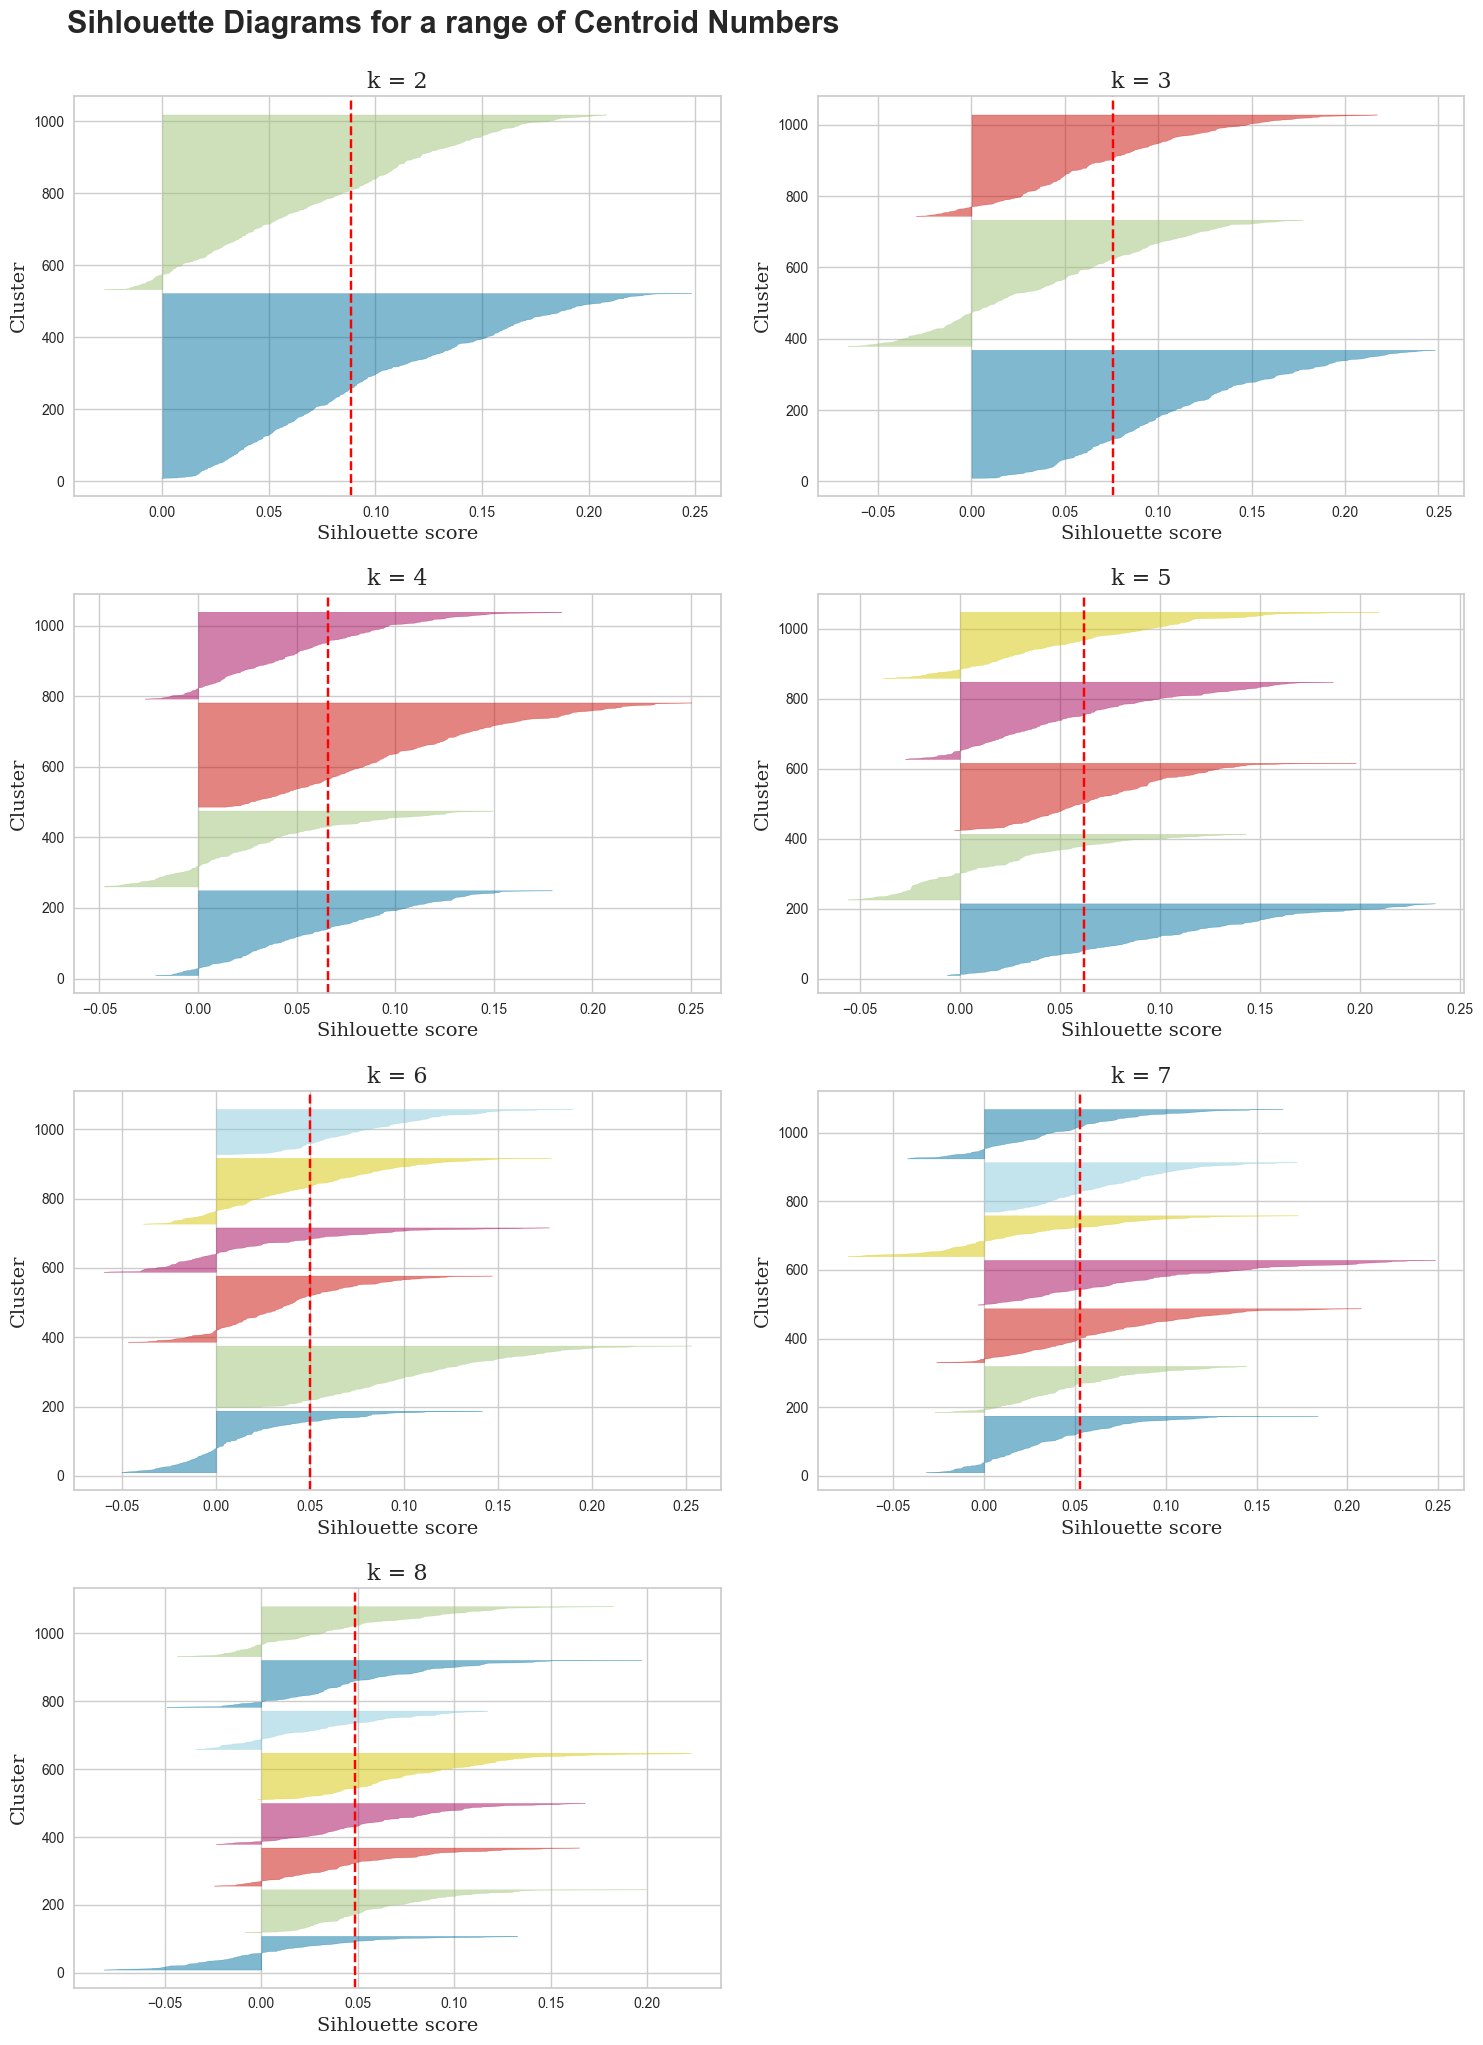

In [19]:
# the clustering isnt optimal but it seems 2/3 clusters seems to produce the best sihlouette scores
rows = 4
cols = 2
fig = plt.figure(figsize=(15, 20))
for k in range(2,9):
    ax = fig.add_subplot(rows, cols, k-1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X_train_proc.drop(columns='id'))
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_train_proc.drop(columns='id').sample(n=1000))
    
    ax.set_title("k = " + str(k), fontsize=16, fontfamily="serif")
    ax.set_xlabel("Sihlouette score", fontsize=14, fontfamily="serif")
    ax.set_ylabel("Cluster", fontsize=14, fontfamily="serif")
    
fig.text(x=0.05, y=1.01, s="Sihlouette Diagrams for a range of Centroid Numbers", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

In [20]:
# training our final method with 2 centroids, our predicted labels here will act as the training 
# set for our supervised model to come
k = 2
kmeans = KMeans(n_clusters=k)
y_train = kmeans.fit_predict(X_train_proc.drop(columns='id'))
kmeans.cluster_centers_

array([[2.05589973, 3.41630537, 2.60472285, 3.80155162, 2.61083803,
        2.94035118, 2.03201888, 3.90336351, 2.42266049, 4.25681751,
        3.78130322, 2.8568315 , 4.19207659, 2.39273777, 3.20093444,
        3.32439773, 3.4837123 , 3.17012194, 3.56431268, 3.38484969,
        2.46259743, 3.47655404, 2.45096027, 3.77604116, 2.55940388,
        3.71775868, 2.61387062, 3.48117958, 3.61467376, 3.24429389,
        3.14544794, 3.07259567, 3.91895639, 2.9818011 , 2.40460821,
        3.07937069, 3.68694618, 2.74709821, 3.04113332, 3.49390648,
        3.58811023, 2.24649002, 3.99168536, 2.10619749, 3.60347982,
        2.05500995, 3.85277916, 3.18929394, 4.20651641, 3.7879416 ],
       [3.2636622 , 2.1477225 , 4.02769184, 2.50222221, 4.01659131,
        1.85654344, 3.56185783, 2.96122512, 3.56392956, 2.88958607,
        2.81929435, 3.55332596, 3.5288082 , 3.000035  , 2.48822405,
        2.38583107, 2.6219939 , 2.19531272, 2.62239284, 2.17778353,
        2.02368487, 4.28056846, 2.08189619, 4.1

In [21]:
# initialising and filling table with our centroids
centers = X_train_proc[0:0].drop(columns='id')
centers.loc[0] = kmeans.cluster_centers_[0]
centers.loc[1] = kmeans.cluster_centers_[1]

In [22]:
centers

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2.055900,3.416305,2.604723,3.801552,2.610838,2.940351,2.032019,3.903364,2.42266,4.256818,...,3.588110,2.246490,3.991685,2.106197,3.603480,2.055010,3.852779,3.189294,4.206516,3.787942
1,3.263662,2.147723,4.027692,2.502222,4.016591,1.856543,3.561858,2.961225,3.56393,2.889586,...,3.826538,1.887157,4.083779,1.879147,4.055776,1.739872,4.201034,3.255004,4.124972,4.189154


In [23]:
# averaging the columns within each trait so we have an aggregate figure for each characteristic
cols = list(centers)
ext = cols[0:10]
est = cols[10:20]
agr = cols[20:30]
csn = cols[30:40]
opn = cols[40:50]
data_sum = pd.DataFrame()
data_sum['extroversion'] = centers[ext].sum(axis=1)/10
data_sum['neurotic'] = centers[est].sum(axis=1)/10
data_sum['agreeable'] = centers[agr].sum(axis=1)/10
data_sum['conscientious'] = centers[csn].sum(axis=1)/10
data_sum['open'] = centers[opn].sum(axis=1)/10

In [24]:
# two personality clusters indicate people who are:
#   0: generally more introverted, agreeable and neurotic
#   1: generally more extroverted, conscientious and open
data_sum

,extroversion,neurotic,agreeable,conscientious,open
0,3.004453,3.335128,3.139733,3.157186,3.262750
1,3.079103,2.739300,3.214526,3.135080,3.324243


# Inferences
Using the K-means algorithm, there are two clusters identified in the Big Five Personality Test dataset. The clustering was done to explore personality traits and group individuals with similar characteristics into clusters.

1. **Cluster 0**:
    - **Personality Traits**: This cluster is characterized by individuals who are more introverted, agreeable, and neurotic.
    - **Interpretation**: These individuals may tend to be more reserved and less outgoing in social situations. They may be cooperative and compassionate in their interactions with others, but they may also experience higher levels of emotional instability or anxiety.

2. **Cluster 1**:
    - **Personality Traits**: This cluster includes individuals who are more extroverted, conscientious, and open to new experiences.
    - **Interpretation**: These individuals may be more sociable and outgoing, enjoying interactions with others and seeking out novel experiences. They may also be more organized, reliable, and thorough in their tasks.

## Key Insights

- **Distinct Personality Profiles**: The two clusters represent distinct personality profiles, each with a unique combination of Big Five traits. This suggests that the dataset contains individuals with varying levels of these traits.
  
- **Potential Applications**: The clustering can be useful for various applications, such as targeted marketing, tailored interventions, or personalized experiences based on the individual's personality profile.

- **Exploring Relationships**: These clusters can help in exploring relationships between different personality traits and other factors, such as demographics, performance outcomes, or other behavioral characteristics.

- **Model Development**: The clusters can be used as a target variable for developing supervised models that predict the cluster membership of new individuals based on their Big Five personality scores.

## Limitations and Considerations

- **Interpretation Caution**: While clustering provides useful insights, it is important to interpret the results cautiously and consider additional context from other variables and data sources.
  
- **Number of Clusters**: The number of clusters was chosen based on the silhouette scores, but alternative clustering algorithms or different numbers of clusters might yield different results.

- **Further Analysis**: Additional analysis and validation with other datasets or expert input might be needed to confirm the generalizability and accuracy of these clusters.

# Agglomerative Clustering

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is the DataFrame containing the Big Five Personality Test data
# Define the columns representing the questions for the Big Five traits
trait_columns = [
    'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
    'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
    'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10',
    'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
    'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'
]

# Sample 1,000 rows randomly from the dataset
sample_size = 8000
X_sample = df[trait_columns].sample(n=sample_size, random_state=42)

# Define the number of clusters
n_clusters = 2  # Adjust as needed based on your analysis

# Perform agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
y_pred = agglomerative.fit_predict(X_sample)

# Calculate silhouette score
silhouette = silhouette_score(X_sample, y_pred)
print(f'Silhouette Score: {silhouette}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette Score: 0.06563490836497803


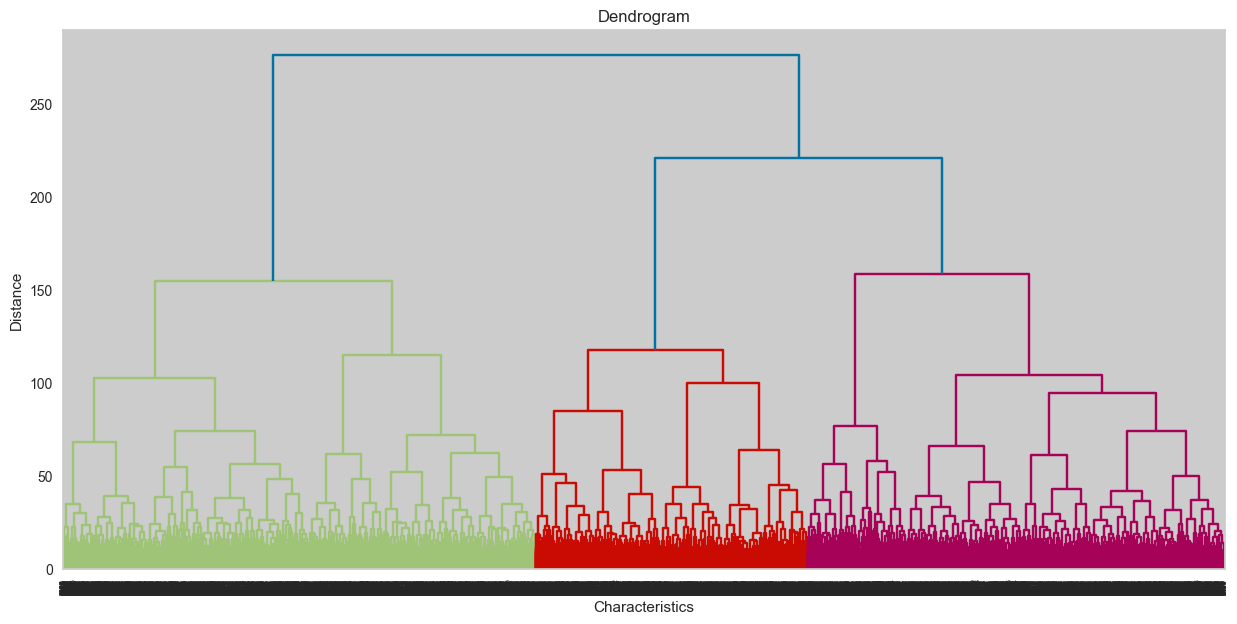

In [54]:
# Plotting dendrogram
# Compute the linkage matrix using the sampled data
linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Characteristics')
plt.ylabel('Distance')
plt.show()

Average values for Cluster 0:
EXT1       2.920847
EXT2       2.523347
EXT3       3.627148
EXT4       2.887867
EXT5       3.602326
EXT6       2.158132
EXT7       3.124978
EXT8       3.227912
EXT9       3.264017
EXT10      3.276341
EST1       2.987502
EST2       3.410693
EST3       3.633571
EST4       2.873112
EST5       2.632182
EST6       2.548169
EST7       2.788752
EST8       2.383093
EST9       2.825898
EST10      2.444020
AGR1       2.254470
AGR2       4.000521
AGR3       2.240583
AGR4       3.964242
AGR5       2.247179
AGR6       3.729214
AGR7       2.073251
AGR8       3.772783
AGR9       3.834924
AGR10      3.782503
CSN1       3.391252
CSN2       2.951397
CSN3       4.002951
CSN4       2.481687
CSN5       2.678875
CSN6       2.779205
CSN7       3.717063
CSN8       2.381184
CSN9       3.253602
CSN10      3.654227
OPN1       3.718452
OPN2       1.984204
OPN3       4.035237
OPN4       1.938379
OPN5       3.945669
OPN6       1.840653
OPN7       4.103801
OPN8       3.201875
OPN9      

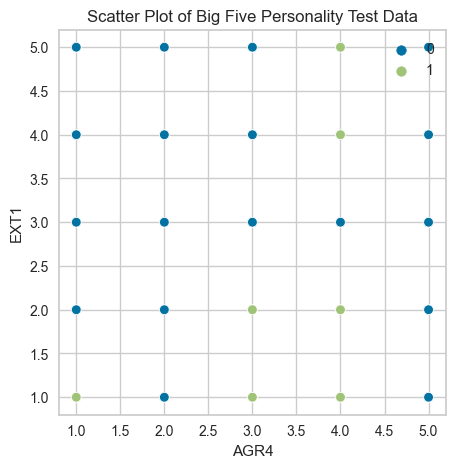

In [53]:

# Interpret the results of the clustering
cluster_0 = X_sample[y_pred == 0]
cluster_1 = X_sample[y_pred == 1]

# Add cluster labels as a new column to the DataFrame
X_sample['cluster'] = y_pred

# Calculate average values for each cluster
avg_cluster_0 = cluster_0.mean()
avg_cluster_1 = cluster_1.mean()

print("Average values for Cluster 0:")
print(avg_cluster_0)
print("\nAverage values for Cluster 1:")
print(avg_cluster_1)

# Visualize the data points colored by their cluster labels
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x='AGR7', y='EXT1', data=X_sample, hue=y_pred
)
plt.title('Scatter Plot of Big Five Personality Test Data')
plt.xlabel('AGR7')
plt.ylabel('EXT1')
plt.show()


# Inferences

1. **Silhouette Score**:
    - The silhouette score of the clustering provides a measure of how well the data points in each cluster are separated from the other clusters.
    - A high silhouette score (close to 1) indicates that the data points are well-separated and that the clustering is of good quality. A low silhouette score (close to -1) suggests poor separation.
    - Here silhouette score shows poor clustering

2. **Dendrogram**:
    - The dendrogram visualizes the hierarchical relationships among the data points.
    - It provides insights into how the clusters are formed and the hierarchical structure of the data.
    - The dendrogram can help you decide whether the chosen number of clusters is appropriate or if a different number would be more suitable.

3. **Cluster Averages**:
    - The average values for each cluster give insights into the characteristics of each cluster.
    - By comparing the averages, you can determine how the clusters differ from one another in terms of the Big Five personality traits.
    - For example, if one cluster has higher average values in agreeableness and another cluster has lower average values, this suggests different personality profiles for the two clusters.

4. **Scatter Plot**:
    - The scatter plot of the data points colored by their cluster labels provides a visual representation of how the clusters are distributed in the space defined by the selected features (`AGR7` and `EXT1`). 
    - The plot allows you to assess how well the clusters are separated and whether there are any overlaps.
    - Due to overlap in this scatter plot, we can observe that inter-cluster seperation is poor.

### Conclusions:

- **Cluster Interpretation**:
    - The analysis and visualizations suggest that the two clusters identified by agglomerative clustering have distinct personality profiles.
    - Each cluster may represent individuals with differing combinations of the Big Five traits.

- **Potential Applications**:
    - The clustering can be used to segment individuals into groups for targeted interventions, marketing strategies, or other applications.
    - Understanding the differences between the clusters can inform personalized approaches based on the personality profiles of each group.